In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import rayleigh, triang, laplace, uniform, expon, gamma, lognorm, nakagami
from scipy.special import j0
from generate_corr_sequence import gen_corr_sequence

linear ACF of Nakagami distribution
exp ACF of Nakagami distribution
damped cosine ACF of Nakagami distribution
bessel ACF of Nakagami distribution


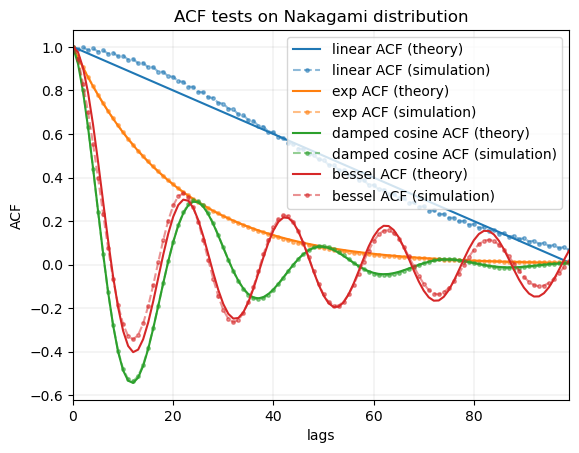

---------------------------------------------
linear ACF of Rayleigh distribution
exp ACF of Rayleigh distribution
damped cosine ACF of Rayleigh distribution
bessel ACF of Rayleigh distribution


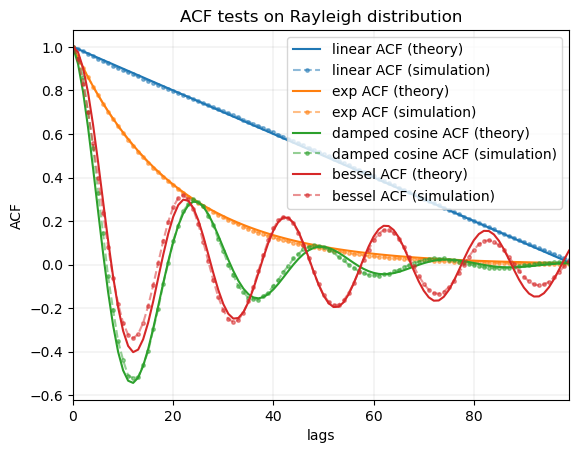

---------------------------------------------
linear ACF of uniform distribution
exp ACF of uniform distribution
damped cosine ACF of uniform distribution
bessel ACF of uniform distribution


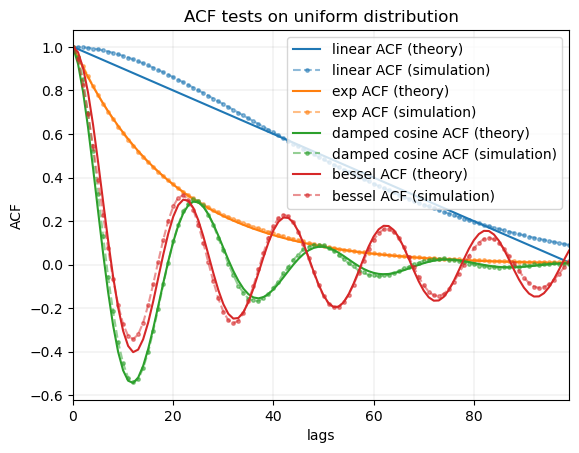

---------------------------------------------
linear ACF of triangular distribution
exp ACF of triangular distribution
damped cosine ACF of triangular distribution
bessel ACF of triangular distribution


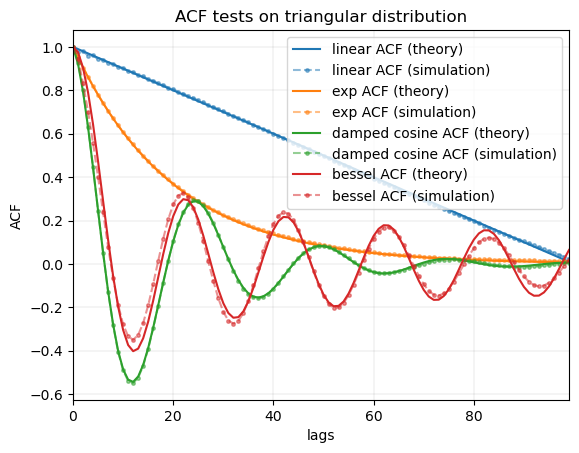

---------------------------------------------
linear ACF of lognormal distribution
exp ACF of lognormal distribution
damped cosine ACF of lognormal distribution
bessel ACF of lognormal distribution


T:\Research\7 Random Module\git\generate_corr_sequence.py:188: UserWarning: The optimization did not converge to the target ACF.
  warnings.warn('The optimization did not converge to the target ACF.')


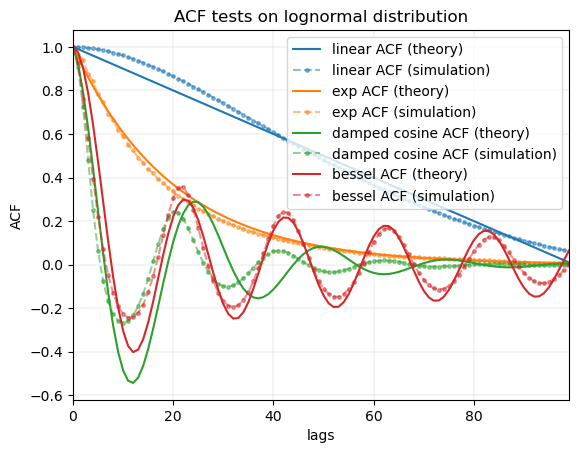

---------------------------------------------
linear ACF of exponential distribution
exp ACF of exponential distribution
damped cosine ACF of exponential distribution
bessel ACF of exponential distribution


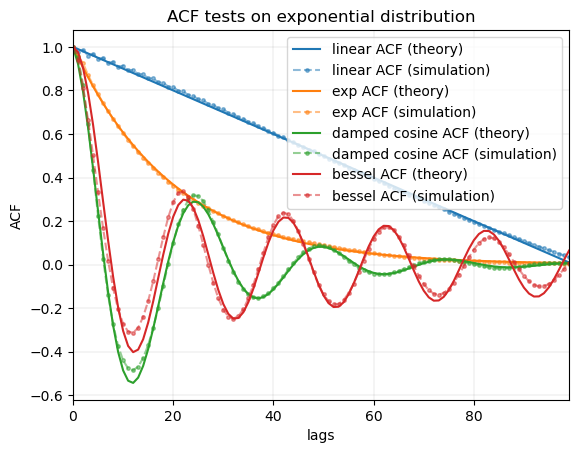

---------------------------------------------
linear ACF of Laplace distribution
exp ACF of Laplace distribution
damped cosine ACF of Laplace distribution
bessel ACF of Laplace distribution


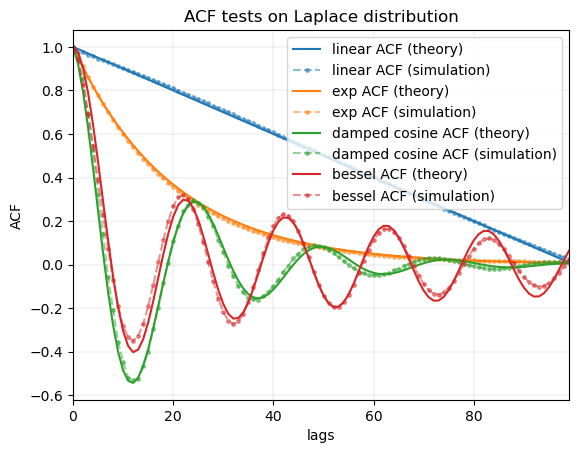

---------------------------------------------
linear ACF of gamma distribution
exp ACF of gamma distribution
damped cosine ACF of gamma distribution
bessel ACF of gamma distribution


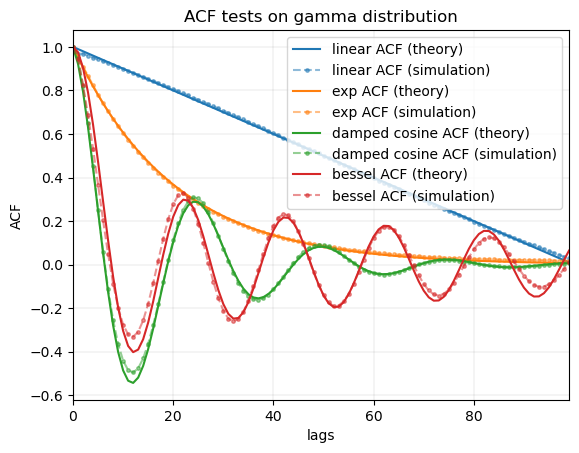

---------------------------------------------


In [2]:
m = np.arange(0,100)
target_acfs = (
    ('linear',(1 - np.minimum(m,100)/100) ),
    ('exp', np.exp(-0.05*np.abs(m)) ),
    ('damped cosine', np.exp(-0.05*np.abs(m))*np.cos(0.25*np.abs(m)) ),
    ('bessel', np.array(j0(0.1*np.pi*abs(m))) )
)

pdfs = (
    ('Ntirakagami', nakagami(nu=1)),
    ('Rayleigh', rayleigh),
    ('uniform', uniform),
    ('triangular', triang(c=0.5)),
    ('lognormal', lognorm(s=1)),
    ('exponential', expon),
    ('Laplace', laplace),
    ('gamma', gamma(a=2)),
)


for i, pdf in enumerate(pdfs):
    plt.figure()
    # https://stackoverflow.com/questions/42086276/get-default-line-colour-cycle
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for j, acf in enumerate(target_acfs):
        print(f'{acf[0]} ACF of {pdf[0]} distribution')
        y = gen_corr_sequence(dist_obj=pdf[1], target_acf=acf[1])
        yCorr = sm.tsa.acf(y, nlags = len(acf[1])-1, fft = True) # the achieved
        plt.plot(m, acf[1], '-', markersize=5, color=cycle[j],
                 label = f'{acf[0]} ACF (theory)')
        plt.plot(m, yCorr, '.--', markersize=5, alpha = 0.5, color=cycle[j],
                 label = f'{acf[0]} ACF (simulation)')
        plt.title(f'ACF tests on {pdf[0]} distribution')
        plt.xlabel('lags')
        plt.ylabel('ACF')
        plt.legend()
        plt.xlim(0, len(acf[1])-1)
        plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.savefig(f'{pdf[0]}.png', dpi=300)
    plt.savefig(f'{pdf[0]}.pdf')
    plt.show()
    print('---------------------------------------------')